# 大世界和小世界（更改为第二章的标题）

当哥伦布在1492年寻找新大陆时，他坚信地球是个球体。为了船员在寻找新大陆时可以拥有足够的食物，哥伦布根据3万公里的地球周长计算出来航行所需的物资。虽然地球的实际周长为4万公里，但幸运的事一路上哥伦布的船队遇到了很多岛屿可供他们提供补给，哥伦布的船队也顺利到达了美洲。

在哥伦布的眼中的小地球（3万公里）和现实中的大地球（4万公里）就像是统计中的模型和真实情况。

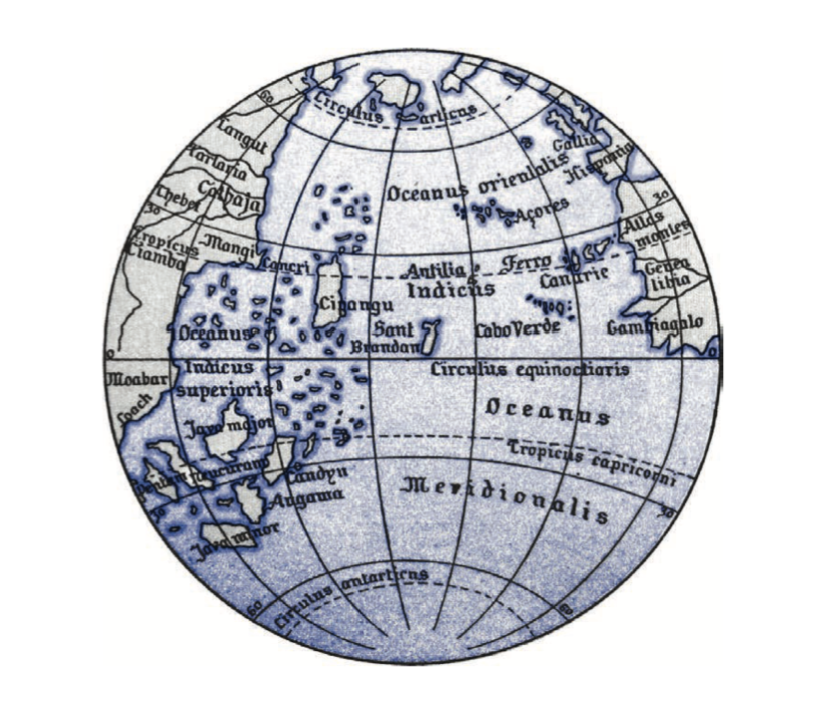

In [1]:
from IPython.display import Image
Image("./figure/figure9.png", alt="1492年世界地图，也是哥伦布的小世界")

在统计中

小世界：所有的可能性都是事先设定的

大世界：大世界是部署模型的更广泛的环境（或改为“模型运行的真实环境”）

贝叶斯模型从证据中学习的方式在小世界中可以说是最佳的。当贝叶斯模型的假设与现实相近时，贝叶斯模型在大世界中也表现良好

## 分叉的小花园

## 计数的可能

假设有一个装着四块鹅卵石的袋子。这些鹅卵石共有白和蓝两种颜色，但是你不知道每种颜色有几块鹅卵石。但是我们可以根据已有的信息判断颜色的组合共有五种情况：

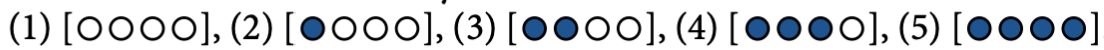

In [2]:
Image("./figure/figure10.png",alt="五种颜色排列的可能")

我们可以将这五种可能称为推测（conjecture）,而我们的目的是基于一些从袋子获取的证据，找出哪一推测虽有可能。现在我们获取到了一些证据：我们又放回的从袋子中依次抽取1个鹅卵石，得到的结果是“蓝色”，“白色”，“蓝色”：

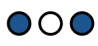

In [3]:
Image("./figure/figure11.png",alt="数据")

这就是我们得到的数据（data）

如果我们推测袋中的鹅卵石的颜色是一蓝三白，那我们总共可以得到64种可能（$4^3$种可能）

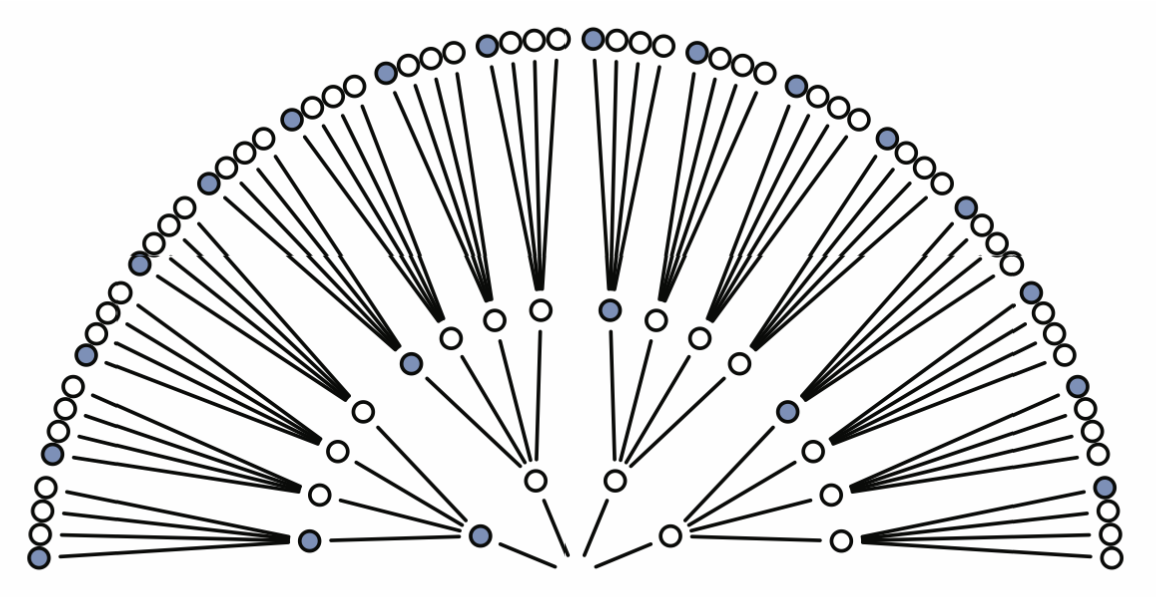

In [4]:
Image("./figure/figure12.png",alt="猜测四块鹅卵石颜色为一蓝三白的64中可能")

在删除与我们观察到数据不一致的路径后，仅有留下了3条路径

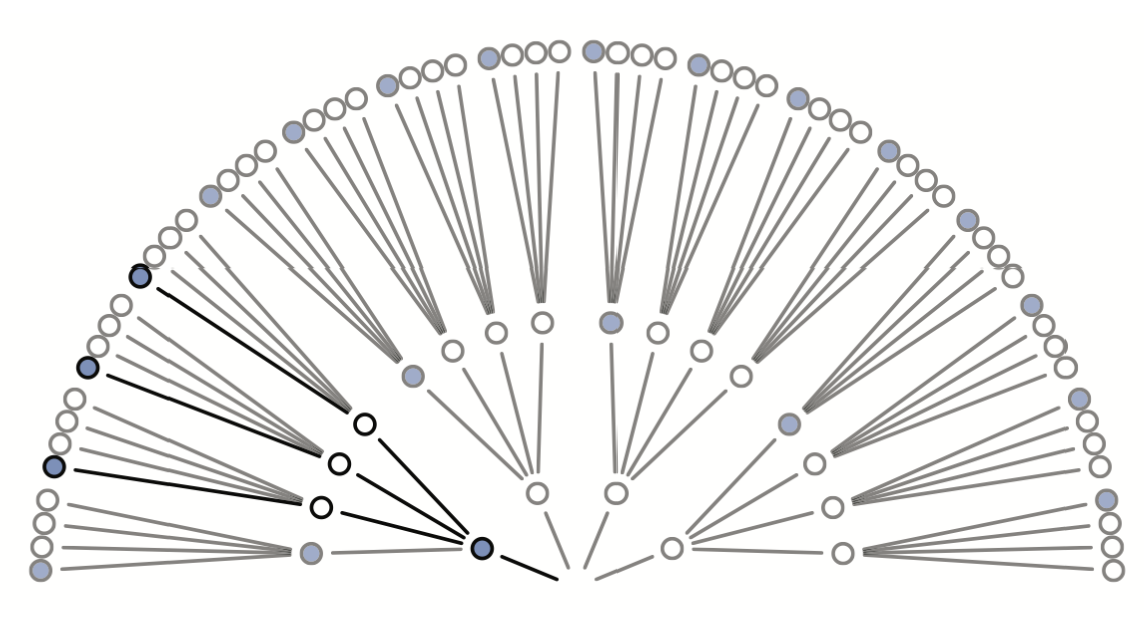

In [5]:
Image("./figure/figure13.png",alt="删除掉与观察数据不一致的路径后（保留路径为黑色实线）")

当我们把鹅卵石颜色的物种推测都考虑完后，我们可以得到以下结果：

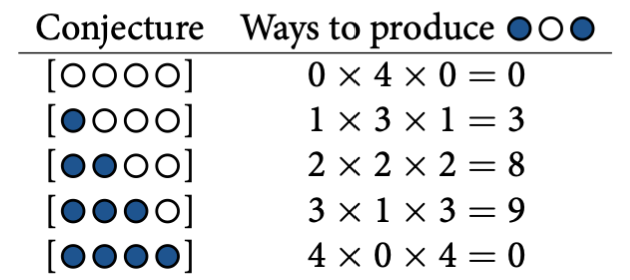

In [6]:
Image("./figure/figure14.png",alt="推测四个鹅卵石为全白，产生蓝-白-蓝数据的发生路径为0，以此类推")

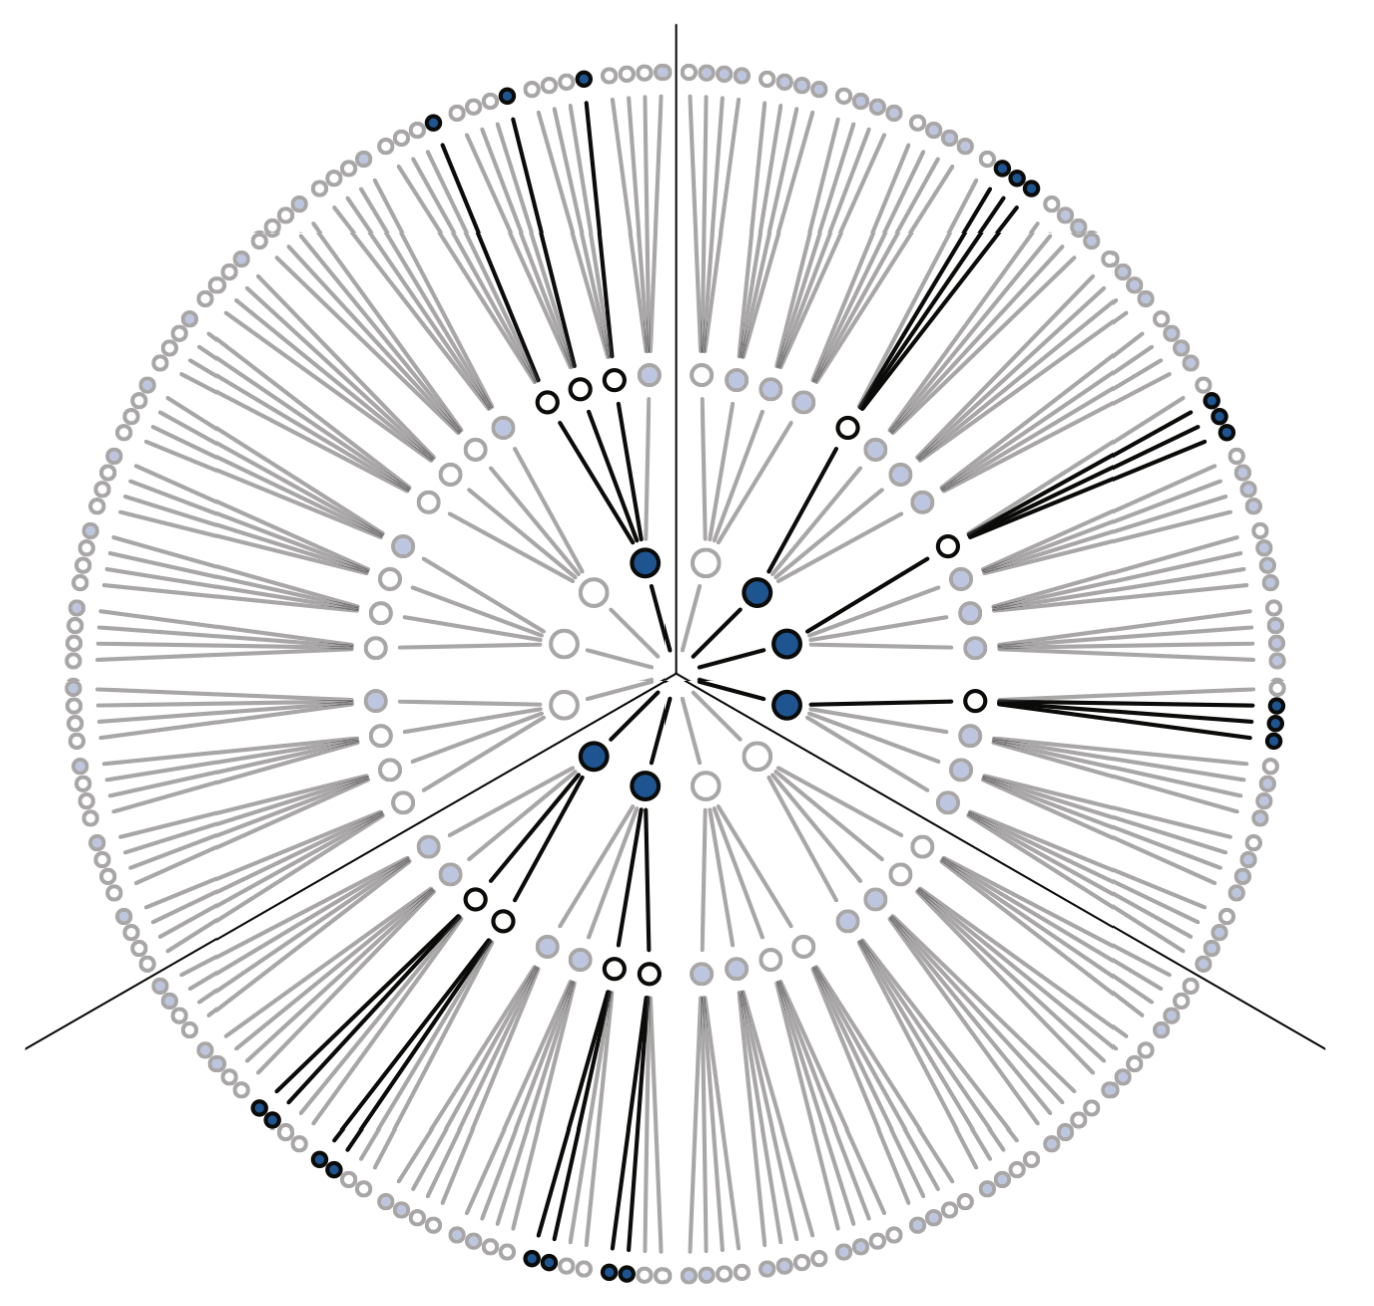

In [7]:
Image("./figure/figure15.png",alt="推测与观察数据结合后的路径图")

### 与其他信息结合

假设我们又进行一次抽样，再次得到一个蓝色鹅卵石。这时，我们推测袋子里各种颜色组合的可能性。

我们把前三次抽样当作已经知道的信息（先验信息），以此为基础加入第四次抽样的结果，并依次推断袋子中鹅卵石颜色组合的可能性大小：

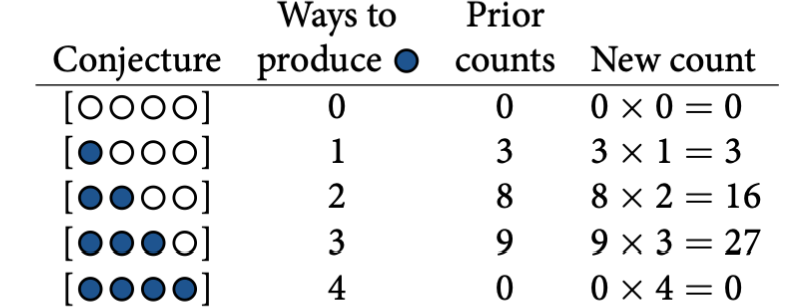

In [8]:
Image("./figure/figure16.png",alt="合并先验信息")

第一列与之前一样，是我们的五个推测；第二列是在我们推测下，抽到篮球方式的数量；第三列是先前的结果；最右边的列汇总了每一个推测的所有证据。


以我们的推测”蓝蓝白白“为例，先前的信息表明共有八种方式产生之前的抽样结果（数据”蓝白蓝“），现在又有两种方式产生新的数据（当前抽到的鹅卵石）。所以推断“蓝蓝白白”一共有$8 \times2 = 16$种方式产生先前的数据和当前的数据

### 从计数到概率

在实际生活中，我们使用更多的是概率，比如，在抽到2个蓝色鹅卵石和1个白色鹅卵石的情况下，袋子里的鹅卵石为一蓝三白的概率为：

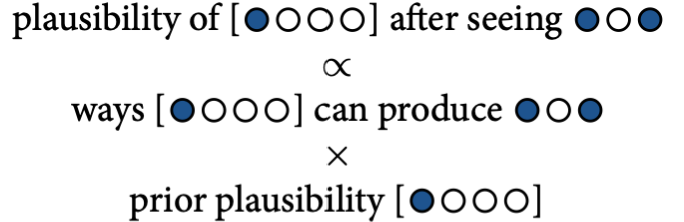

In [9]:
Image("./figure/figure17.png",alt="概率公式")

为了将所有推测的概率之和为1，我们要将概率标准化：

我们将p定义为鹅卵石为蓝色的占比，如鹅卵石颜色为三白一蓝时，p为0.25

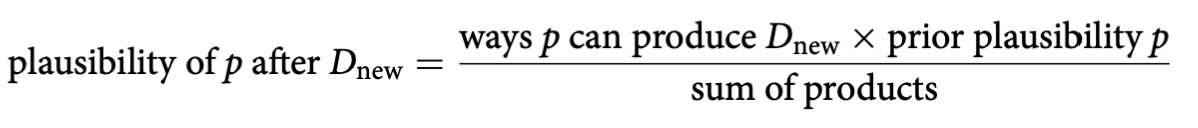

In [10]:
Image("./figure/figure18.png",alt="标准化概率公式")

#### 现在我们用一个例子并用Python实现它

现在使用我们对p和“plausibility”的定义进行更新：

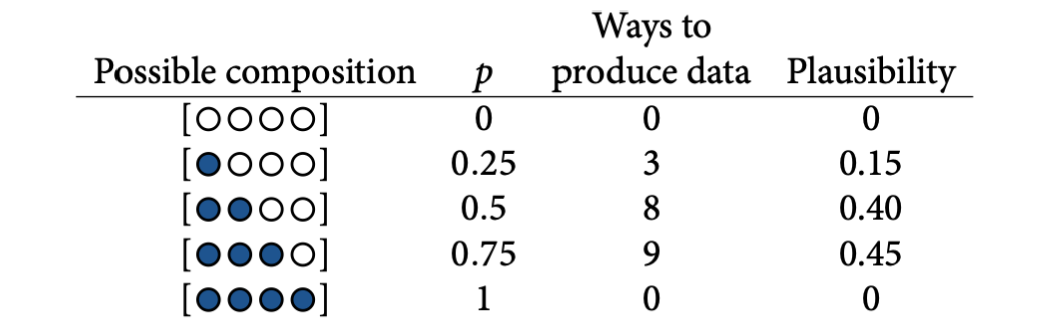

In [11]:
Image("./figure/figure19.png",alt="p和plausibility")

In [12]:
import numpy as np

In [13]:
ways = [0, 3, 8, 9, 0]

In [14]:
ways

[0, 3, 8, 9, 0]

In [15]:
ways/np.sum(ways)

array([0.  , 0.15, 0.4 , 0.45, 0.  ])

In [16]:
p = [0, 0.25, 0.5, 0.75, 1]

for 循环

In [17]:
for i, j in zip(p, ways):#zip() 函数用于将可迭代的对象作为参数，将对象中对应的元素打包成一个个元组，然后返回由这些元组组成的列表。
    print(i*j)

0
0.75
4.0
6.75
0


新建一个list_products列表，将p和ways相乘后加进去

In [18]:
list_products = [];
for i, j in zip(p, ways):
    list_products.append(i*j)

In [19]:
list_products

[0, 0.75, 4.0, 6.75, 0]

新加一个sum_products列表

In [20]:
sum_products = np.sum(list_products)

观测到新数据后第二种推测发生的概率为：

In [21]:
(3*0.25)/sum_products

0.06521739130434782